# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

With a change in the format of SAT in March 2016, this report aims to analyse SAT and ACT participation rate for 2017 and 2018 and how to improve the SAT participation rate.

## Executive Summary

This report provides an analysis and evaluation of the American College Testing (ACT) and Scholastic Aptitude Test (SAT) dataset, consisting of the participation rates and aggregate scores for each state in the United States.

Recommendations discussed include:
- Listing the benefits of the new SAT format and how it would benefit students, working towards making it mandatory for high school students to take the SAT as a graduating requirement.
- Providing more resources like food and vouchers or working with the state to ease the finanical burden of students.
- Equipping pre-test preparation in school or online to prepare students for SAT, increasing their confidence level and maximising their capabilities.

Several data visualisation like histograms, scatter plot, box plot and heatmaps were used to understand the data better, show trends and outliers.

Some trends observed are that most of the scores have an inverse relationship with participation rate. In addition, an increase in participation rate for SAT led to the decrease in participation rate for ACT.


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
# Importing NumPy, Pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read sat_2017, act_2017 csv files and convert them into pandas dataframes
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Display first 10 rows of sat_2017 dataframe
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# Display first 10 rows of act_2017 dataframe
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The SAT 2017 data shows the participation rate, the mean evidence-based reading and writing, math and the total scores for each state in the United States. There are a total of 51 observations (50 states and District of Columbia).

The ACT 2017 data shows the participation rate, the mean english, math, reading, science and composite scores for each state in the United States. There are a total of 52 observations (50 states, District of Columbia and National).

#### 4a. Does the data look complete? 

The data is complete but contains incorrect data, namely; Maryland's SAT 2017 math score (52) and Maryland's ACT 2017 science score (2.3), as well as Wyongming's ACT 2017 composite score (20.2x). <br>
Data from the provided dataframes was compared with actual data obtained from the official SAT and ACT data. For better analysis, the dataframe can be improved to include population of each state.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Yes, there are extreme outliers with regards to Maryland's SAT 2017 math score (52) and ACT 2017 science score (2.3) as well as Wyoming's ACT 2017 composite score (20.2x).


- For ACT, the minimum possible score is 1 for each test and the maximum possible score is 36 for each test.<br>
- For SAT, the minimum possible score is 200 for each test and the maximum possible score is 800 for each test.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# Replace Maryland's act_2017 science score from 2.3 to 23.2
act_2017['Science'].replace(2.3, 23.2, inplace=True)

In [6]:
# Replace Maryland's sat_2017 math score from 52 to 524
sat_2017['Math'].replace(52, 524, inplace=True)

In [7]:
# Replace Wyoming's act_2017 composite score from 20.2x to 20.2
act_2017['Composite'].replace('20.2x', '20.2', inplace=True)

Sources for correct data:

[ACT 2017/2018 data](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

[SAT 2017/2018 data](http://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf)

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
# Display the data types of act_2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [9]:
# Display the data types of sat_2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Yes, the data type for participation column from both SAT and ACT should be an integer or float instead of an object. 
<br>The data type for composite column should be a float instead of an object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
def to_num(df):
    """Convert participation rate to appropriate numeric type"""
    return df.assign(Participation = df['Participation'].map(lambda x: x.rstrip('%')))

In [11]:
def to_num_type(df, column):
    """Convert column in dataframe to numeric type"""
    df[column] = pd.to_numeric(df[column])
    return df.head()

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
# Convert participation column in sat_2017 to appropriate numeric type
sat_2017 = to_num(sat_2017)

# Convert participation column to integer type
to_num_type(sat_2017, 'Participation')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [13]:
# Convert participation column in act_2017 to appropriate numeric type
act_2017 = to_num(act_2017)

# Convert participation column to integer type
to_num_type(act_2017, 'Participation')

# Convert composite column to float type
to_num_type(act_2017, 'Composite')

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [14]:
# Updated act_2017 data types
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [15]:
# Updated sat_2017 data types
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
#Rename sat_2017 columns name
sat_2017.rename({'State':'state', 'Participation':'sat_2017_participation_rate', 'Evidence-Based Reading and Writing':'sat_2017_reading_writing', 'Math':'sat_2017_math', 'Total':'sat_2017_total'}, axis=1, inplace=True)
sat_2017.head()

,state,sat_2017_participation_rate,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [17]:
#Rename act_2017 column names
act_2017.rename({'State':'state', 'Participation':'act_2017_participation_rate', 'English':'act_2017_eng', 'Math':'act_2017_math', 'Reading':'act_2017_reading', 'Science':'act_2017_science', 'Composite':'act_2017_composite'}, axis=1, inplace=True)
act_2017.head()

,state,act_2017_participation_rate,act_2017_eng,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|final|The states in US|
|**sat_2017_participation_rate**|*integer*|final|The percentage of graduates who took the SAT test in 2017
|**sat_2017_reading_writing**|*integer*|final|Average evidence-based reading and writing score for that state (min score is 200 and max score is 800)
|**sat_2017_math**|*integer*|final|Average math score for that state (min score is 200 and max score is 800)
|**sat_2017_total**|*integer*|final|Average SAT total score (evidence based reading and writing and math) for that state 
|**act_2017_participation_rate**|*integer*|final|The percentage of graduates who took the ACT test in 2017
|**act_2017_eng**|*float*|final|Average english score for that state (min score is 1 and max score is 36)
|**act_2017_math**|*float*|final|Average math score for that state (min score is 1 and max score is 36) 
|**act_2017_reading**|*float*|final|Average reading score for that state (min score is 1 and max score is 36)
|**act_2017_science**|*float*|final|Average science score for that state (min score is 1 and max score is 36)
|**act_2017_composite**|*float*|final|Average of all ACT tests (eng, math, reading ,science)
|**sat_2018_participation_rate**|*integer*|final|The percentage of graduates who took the SAT test in 2018
|**sat_2018_reading_writing**|*integer*|final|Average evidence-based reading and writing score for that state (min score is 200 and max score is 800)
|**sat_2018_math**|*integer*|final|Average math score for that state (min score is 200 and max score is 800)
|**sat_2018_total**|*integer*|final|Average SAT total score (evidence based reading and writing and math) for that state 
|**act_2018_participation_rate**|*integer*|final|The percentage of graduates who took the ACT test 2018
|**act_2018_eng**|*float*|final|Average english score for that state (min score is 1 and max score is 36)
|**act_2018_math**|*float*|final|Average math score for that state (min score is 1 and max score is 36) 
|**act_2018_reading**|*float*|final|Average reading score for that state (min score is 1 and max score is 36)
|**act_2018_science**|*float*|final|Average science score for that state (min score is 1 and max score is 36)
|**act_2018_composite**|*float*|final|Average of all ACT tests (eng, math, reading ,science)

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
# Remove the extra row (National state) in act_2017
act_2017.drop([0], inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
# Merge act_2017 and sat_2017 together
combined_2017 = pd.merge(act_2017, sat_2017, how='inner')
combined_2017.head()

,state,act_2017_participation_rate,act_2017_eng,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_rate,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
# Save out data as combined_2017.csv
combined_2017.to_csv('combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [21]:
# Read and convert 2018 ACT and SAT data into pandas dataframes
act_2018 = pd.read_csv('data/act_2018_updated.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')

In [22]:
# Display top 10 rows of act_2018 dataframe
act_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [23]:
# Show the data types of each column
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [24]:
#Rename act_2018 column names and bring composite column to the last column
act_2018.rename({'State':'state', 'Percentage of Students Tested':'act_2018_participation_rate', 'Average English Score':'act_2018_eng', 'Average Math Score':'act_2018_math', 'Average Reading Score':'act_2018_reading', 'Average Science Score':'act_2018_science', 'Average Composite Score':'act_2018_composite'}, axis=1, inplace=True)
act_2018 = act_2018[['state', 'act_2018_participation_rate', 'act_2018_eng', 'act_2018_math', 'act_2018_reading', 'act_2018_science', 'act_2018_composite']]
act_2018.head()

,state,act_2018_participation_rate,act_2018_eng,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [25]:
# Display top 10 rows of sat_2018 dataframe
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [26]:
# Show the data types of each column
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [27]:
# Convert participation column in sat_2018 to appropriate numeric type
sat_2018 = to_num(sat_2018)

# Convert participation column to integer type
to_num_type(sat_2018, 'Participation')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [28]:
# Show the updated sat_2018 data types
sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [29]:
#Rename sat_2017 column names
sat_2018.rename({'State':'state', 'Participation':'sat_2018_participation_rate', 'Evidence-Based Reading and Writing':'sat_2018_reading_writing', 'Math':'sat_2018_math', 'Total':'sat_2018_total'}, axis=1, inplace=True)
sat_2018.head()

,state,sat_2018_participation_rate,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [30]:
# From the analysis of outliers in the later section of this report, I found out that Utah and Hawaii have the same set of SAT 2018 scores and they both are wrong.
# Replace Utah's sat 2018 evidence-based reading and writing from 480 to 618, math from 530 to 612 and total from 1010 to 1230.
# Replace Hawaii's sat 2018 evidence-based reading and writing from 480 to 550, math from 530 to 549 and total from 1010 to 1099.
sat_2018.loc[sat_2018['state'] == 'Utah', 'sat_2018_reading_writing'] = 618
sat_2018.loc[sat_2018['state'] == 'Utah', 'sat_2018_math'] = 612
sat_2018.loc[sat_2018['state'] == 'Utah', 'sat_2018_total'] = 1230
sat_2018.loc[sat_2018['state'] == 'Hawaii', 'sat_2018_reading_writing'] = 550
sat_2018.loc[sat_2018['state'] == 'Hawaii', 'sat_2018_math'] = 549
sat_2018.loc[sat_2018['state'] == 'Hawaii', 'sat_2018_total'] = 1099

Sources for correct data:

[ACT 2017/2018 data](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

[SAT 2017/2018 data](http://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [31]:
# Merge both act_2018 and sat_2018 into combined_2018.csv
combined_2018 = pd.merge(act_2018, sat_2018, how='inner')
combined_2018.to_csv('combined_2018.csv', index=False)

# Merge combined_2017 and combined_2018 dataframes into final dataframe and export to csv file
final = pd.merge(combined_2017, combined_2018, how='inner')
final.to_csv('final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
# Descriptive statistics for each numeric feature in final dataframe
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation_rate,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation_rate,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [33]:
def standard_deviation(df, column):
    """Return the standard deviation of a column in dataframe"""
    list=[]
    mean = df[column].mean()
    for each_row in df.index:
        inner_bracket = (df[column][each_row] - mean) ** 2
        list.append(inner_bracket)
        result = (sum(list) / len(df)) ** 0.5
    return result

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
# Create a dictionary comprehension of numeric features where keys are the column names and values are the standard deviations.
sd = {column:standard_deviation(final, column) for column in final if column != 'state'}
sd

{'act_2017_participation_rate': 31.824175751231806,
 'act_2017_eng': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation_rate': 34.92907076664508,
 'sat_2017_reading_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation_rate': 33.745194881997506,
 'act_2018_eng': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147,
 'sat_2018_participation_rate': 36.946619223539415,
 'sat_2018_reading_writing': 44.52520248450358,
 'sat_2018_math': 47.62941656758188,
 'sat_2018_total': 91.79214438114205}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [35]:
# Generate standard deviations using numpy's std method
np.std(final)

act_2017_participation_rate    31.824176
act_2017_eng                    2.330488
act_2017_math                   1.962462
act_2017_reading                2.046903
act_2017_science                1.722216
act_2017_composite              2.000786
sat_2017_participation_rate    34.929071
sat_2017_reading_writing       45.216970
sat_2017_math                  46.657134
sat_2017_total                 91.583511
act_2018_participation_rate    33.745195
act_2018_eng                    2.422254
act_2018_math                   2.015707
act_2018_reading                2.145892
act_2018_science                1.851689
act_2018_composite              2.085526
sat_2018_participation_rate    36.946619
sat_2018_reading_writing       44.525202
sat_2018_math                  47.629417
sat_2018_total                 91.792144
dtype: float64

The manually calculated standard deviations do not match with the output from pandas describe method. 
<br>However, they matched with numpy's std method. The pandas describe method included the unbiased estimator (N-1 in the denominator) but NumPy and my manual calculated standard deviations do not.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [36]:
# 17 states had 100% participation rate for ACT 2017.
final.sort_values(['act_2017_participation_rate'], ascending=False)[['state', 'act_2017_participation_rate']].head(30)

,state,act_2017_participation_rate
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


For ACT 2017, there were 17 states with 100% participation rate.
- Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Neveda, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado and Arkansas.

In [37]:
# Maine had the lowest 2017 ACT participation rate at 8%.
final.sort_values(['act_2017_participation_rate'])[['state', 'act_2017_participation_rate']].head(10)

,state,act_2017_participation_rate
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23
20,Maryland,28
45,Vermont,29
21,Massachusetts,29
22,Michigan,29
46,Virginia,29


There was only 1 state with the lowest participation rate for ACT 2017 - Maine at 8%

In [38]:
# 17 states had 100% participation rate for ACT 2018. Ohio, Nebraska joined the 100% participation rate while Minnesota and Colorado dropped.
final.sort_values(['act_2018_participation_rate'], ascending=False)[['state', 'act_2018_participation_rate']].head(40)

,state,act_2018_participation_rate
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


Likewise for ACT 2018, there were 17 states who attained 100% participation rate.
- Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming and Arkansas.

- The ACT 100% participation rate in 2017 for Minnesota and Colorado dropped from to 99% and 30% respectively in 2018.
- Ohio and Nebraska increased from 75% and 84% in 2017 to 100% in 2018.
- Colorado had a huge decrease in participation rate from 2017 to 2018.

In [39]:
# Maine had still the lowest participation rate. However, it dropped 1% from 2017. Now at 7%
final.sort_values(['act_2018_participation_rate'])[['state', 'act_2018_participation_rate']].head(10)

,state,act_2018_participation_rate
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20
22,Michigan,22
47,Washington,24
45,Vermont,24
46,Virginia,24
21,Massachusetts,25


Likewise for ACT 2018, Maine had the lowest participation rate of 7%, down 1% from 2017

In [40]:
# 4 states had 100% participation rate from SAT 2017.
final.sort_values(['sat_2017_participation_rate'], ascending=False)[['state', 'sat_2017_participation_rate']].head(31)

,state,sat_2017_participation_rate
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96
19,Maine,95
12,Idaho,93
9,Florida,83
21,Massachusetts,76
39,Rhode Island,71


For SAT 2017, 4 states attained the highest participation rate of 100%.
- District of Columbia, Michigan, Connecticut and Delaware

In [41]:
# 3 states had the lowest participation rate of 2% for SAT 2017.
final.sort_values(['sat_2017_participation_rate'])[['state', 'sat_2017_participation_rate']].head(10)

,state,sat_2017_participation_rate
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
23,Minnesota,3
50,Wyoming,3


For SAT 2017, 3 states had the lowest participation rate of 2%.
- North Dakota, Mississippi and Iowa

In [42]:
# 5 states had the highest participation rate at 100% for SAT 2018. From 2017, participation rates for Colorado, Michigan and Idaho increased while District of Columbia decreased. 
final.sort_values(['sat_2018_participation_rate'], ascending=False)[['state', 'sat_2018_participation_rate']].head(10)

,state,sat_2018_participation_rate
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99
39,Rhode Island,97
29,New Hampshire,96
8,District of Columbia,92


For SAT 2018, 5 states attained the highest participation rate of 100%.
- Colorado, Connecticut, Delaware, Michigan and Idaho

- SAT 100% participation rate for District of Columbia in 2017 dropped to 92% in 2018.
- Colorado and Idahos' participation rate increased from 11% and 93% to 100% respectively in 2018.
- Colorado had a huge increase in participation rate from 2017 to 2018.

<br>This shows an inverse relationship from ACT where Colorado participation rate dropped greatly from 2017 to 2018.
<br>Colorado probably switch from mandatory ACT to SAT in 2018.

In [43]:
# North Dakota had the lowest 2018 SAT participation rate at 2%. From 2017, Mississippi and Iowa increased 1%.
final.sort_values(['sat_2018_participation_rate'])[['state', 'sat_2018_participation_rate']].head(10)

,state,sat_2018_participation_rate
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
24,Mississippi,3
15,Iowa,3
44,Utah,4
23,Minnesota,4
18,Louisiana,4


For SAT 2018, only 1 state had the lowest 2% participation rate - North Dakota

In [44]:
# New Hampshire had the highest mean composite scores of 25.5 for ACT 2017.
final.sort_values(['act_2017_composite'], ascending=False)[['state', 'act_2017_composite']].head(10)

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


New Hampshire had the highest composite score of 25.5 for ACT 2017.

In [45]:
# Nevada had the lowest mean composite score of 17.8 for ACT 2017.
final.sort_values(['act_2017_composite'])[['state', 'act_2017_composite']].head(10)

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


Nevada had the lowest composite score of 17.8 at ACT 2017.

In [46]:
# Connecticut had the highest mean composite score of 25.6 for ACT 2018.
final.sort_values(['act_2018_composite'], ascending=False)[['state', 'act_2018_composite']].head(10)

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
46,Virginia,23.9
5,Colorado,23.9


Connecticut had the highest composite score of 25.6 at ACT 2018.

In [47]:
# Neveda had the lowest mean composite score of 17.7 for ACT 2018.
final.sort_values(['act_2018_composite'])[['state', 'act_2018_composite']].head(10)

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


Likewise, Nevada had the lowest composite score of 17.7 at ACT 2018, dropped 0.1 from ACT 2017.

In [48]:
# Minnesota had the highest mean SAT 2017 total score of 1295.
final.sort_values(['sat_2017_total'], ascending=False)[['state', 'sat_2017_total']].head(10)

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260
34,North Dakota,1256
27,Nebraska,1253
17,Kentucky,1247
24,Mississippi,1242
44,Utah,1238


Minnesota had the highest mean total score at 1295 for SAT 2017

In [49]:
# District of Columbia had the lowest mean total score of 950 for SAT 2017.
final.sort_values(['sat_2017_total'])[['state', 'sat_2017_total']].head(10)

,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
36,Oklahoma,1047
10,Georgia,1050


District of Columbia had the lowest mean total score at 950 for SAT 2017.

In [50]:
# Minnesota had the highest mean total score for SAT 2018, similar to 2017.
final.sort_values(['sat_2018_total'], ascending=False)[['state', 'sat_2018_total']].head(10)

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265
25,Missouri,1262
50,Wyoming,1257
27,Nebraska,1252
17,Kentucky,1248
41,South Dakota,1240


Likewise, Minnesota had the highest mean total score at 1298 for SAT 2018, with an increase of 3 from SAT 2017.

In [51]:
# District of Columbia had the lowest mean total score of 977 for SAT 2018, similar to 2017.
final.sort_values(['sat_2018_total'])[['state', 'sat_2018_total']].head(10)

,state,sat_2018_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
22,Michigan,1011
19,Maine,1013
39,Rhode Island,1018
13,Illinois,1019
5,Colorado,1025
43,Texas,1032


Likewise, District of Columbia had the lowest mean total score of 977 for SAT 2018. However, the mean total score managed to increase by 27 from SAT 2017.

In [52]:
# States with participation rate > 50% for both SAT and ACT in 2017
final[(final['sat_2017_participation_rate'] > 50)  & (final['act_2017_participation_rate'] > 50)][['state', 'act_2017_participation_rate', 'sat_2017_participation_rate']]

,state,act_2017_participation_rate,sat_2017_participation_rate
9,Florida,73,83
10,Georgia,55,61
11,Hawaii,90,55


3 states - Florida, Georgia and Hawaii had participation rates of more than 50% for ACT and SAT in 2017.

In [53]:
# States with participation rate > 50% for both SAT and ACT in 2018
final[(final['sat_2018_participation_rate'] > 50) & (final['act_2018_participation_rate'] > 50)][['state', 'act_2018_participation_rate', 'sat_2018_participation_rate']]

,state,act_2018_participation_rate,sat_2018_participation_rate
9,Florida,66,56
10,Georgia,53,70
11,Hawaii,89,56
33,North Carolina,100,52
40,South Carolina,100,55


5 states - Florida, Georgia, Hawaii, North Carolina and South Carolina had participation rates of more than 50% for ACT and SAT in 2018.

###### Comparing the change of participation rate

In [54]:
# Add a new column called diff_act to show the change of ACT participation rate from 2017 to 2018
final['diff_act'] = final['act_2018_participation_rate'] - final['act_2017_participation_rate']

In [55]:
# Largest decrease in ACT participation rate from 2017 to 2018
final.sort_values(['diff_act'])[['state', 'act_2017_participation_rate', 'act_2018_participation_rate', 'diff_act']].head()

,state,act_2017_participation_rate,act_2018_participation_rate,diff_act
5,Colorado,100,30,-70
13,Illinois,93,43,-50
1,Alaska,65,33,-32
9,Florida,73,66,-7
22,Michigan,29,22,-7


Colorado showed the greatest decrease in participation rate at 70%, followed by Illinois at 50% and then Alaska at 32% decrease for ACT 2017 to 2018.

In [56]:
# Largest increase in ACT participation rate from 2017 to 2018
final.sort_values(['diff_act'], ascending=False)[['state', 'act_2017_participation_rate', 'act_2018_participation_rate', 'diff_act']].head()

,state,act_2017_participation_rate,act_2018_participation_rate,diff_act
35,Ohio,75,100,25
27,Nebraska,84,100,16
2,Arizona,62,66,4
20,Maryland,28,31,3
37,Oregon,40,42,2


Ohio showed the greatest increase in ACT participation rate of 25% from 2017 to 2018.

In [57]:
# Add a new column called diff_sat to show the change of SAT participation rate from 2017 to 2018
final['diff_sat'] = final['sat_2018_participation_rate'] - final['sat_2017_participation_rate']

In [58]:
# Largest decrease in SAT participation rate from 2017 to 2018
final.sort_values(['diff_sat'])[['state', 'sat_2017_participation_rate', 'sat_2018_participation_rate', 'diff_sat']].head()

,state,sat_2017_participation_rate,sat_2018_participation_rate,diff_sat
9,Florida,83,56,-27
8,District of Columbia,100,92,-8
28,Nevada,26,23,-3
2,Arizona,30,29,-1
50,Wyoming,3,3,0


Florida showed the greatest decrease in SAT participation rate from 2017 to 2018 at 27%.

In [59]:
# Largest increase in SAT participation rate from 2017 to 2018
final.sort_values(['diff_sat'], ascending=False)[['state', 'sat_2017_participation_rate', 'sat_2018_participation_rate', 'diff_sat']].head()

,state,sat_2017_participation_rate,sat_2018_participation_rate,diff_sat
13,Illinois,9,99,90
5,Colorado,11,100,89
39,Rhode Island,71,97,26
48,West Virginia,14,28,14
30,New Jersey,70,82,12


Illinois showed the greatest increase for SAT participation rate from 2017 to 2018 at 90%, followed by Colorado at 89% and then Rhode Island at 26%.

Although Illinois and Colorado had a large decrease in participation rate from ACT 2017 to 2018. They had a large increase from SAT 2017 to 2018. This shows that they switched from ACT to SAT.

In [60]:
# States with both participation rate in SAT and ACT increase from 2017 to 2018.
final[(final['diff_sat'] > 0) & (final['diff_act'] > 0)][['state', 'act_2017_participation_rate', 'act_2018_participation_rate', 'sat_2017_participation_rate', 'sat_2018_participation_rate', 'diff_act', 'diff_sat']]

,state,act_2017_participation_rate,act_2018_participation_rate,sat_2017_participation_rate,sat_2018_participation_rate,diff_act,diff_sat
15,Iowa,67,68,2,3,1,1
20,Maryland,28,31,69,76,3,7
31,New Mexico,66,67,11,16,1,5
35,Ohio,75,100,12,18,25,6
37,Oregon,40,42,43,48,2,5


5 states - Iowa, Maryland, New Mexico, Ohio and Oregon shown an increase in both SAT and ACT participation rates from 2017 to 2018.

In [61]:
# State with less than 50% participation rate for 2017
final[(final['act_2017_participation_rate'] < 50 ) & (final['sat_2017_participation_rate'] < 50)][['state', 'act_2017_participation_rate', 'act_2018_participation_rate', 'sat_2017_participation_rate', 'sat_2018_participation_rate']]

,state,act_2017_participation_rate,act_2018_participation_rate,sat_2017_participation_rate,sat_2018_participation_rate
37,Oregon,40,42,43,48


In [62]:
# States with less than 50% participation rate for 2018
final[(final['act_2018_participation_rate'] < 50 ) & (final['sat_2018_participation_rate'] < 50)][['state', 'act_2017_participation_rate', 'act_2018_participation_rate', 'sat_2017_participation_rate', 'sat_2018_participation_rate']]

,state,act_2017_participation_rate,act_2018_participation_rate,sat_2017_participation_rate,sat_2018_participation_rate
1,Alaska,65,33,38,43
37,Oregon,40,42,43,48


In [63]:
# Remove the 2 extra columns of change of participation rate
final.drop(columns=['diff_act', 'diff_sat'], axis =1, inplace=True)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

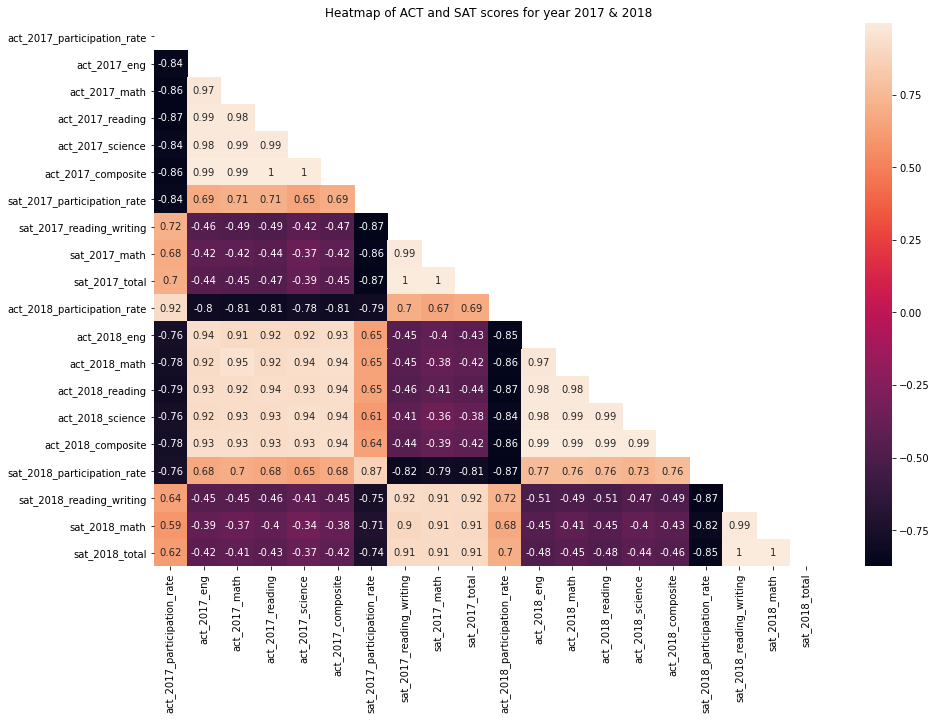

In [64]:
plt.figure(figsize=(15,10))
mask = np.triu(final.corr())
sns.heatmap(final.corr(), annot=True, mask=mask);
plt.title('Heatmap of ACT and SAT scores for year 2017 & 2018');

There is a strong positive correlation between the scores of individual sections of each test, from 0.8 to 0.99. A high score in one section of the ACT would likely mean a high score in another section of the ACT, similarly, a state that has a high score in the reading and writing section of the SAT would also have a high score in the math section. This holds true across 2017 and 2018 as well. 

The participation rates in 2017 for ACT and SAT were strongly negative correlated at -0.84. The participation rate in 2018 for ACT and SAT were also strongly negatively correlated at -0.87. This meant that states with high ACT participation rate had low SAT participation rate and vice versa.
<br> This might occur because most of the states only require students to either take the SAT or ACT or some states making either SAT or ACT a mandatory examination.

There is also a strong negative correlation between ACT participation rate and ACT individual test scores for both year. Similarly, SAT participation rate and SAT individual test scores had negative correlation as well. This showed that a high participation rate led to a decrease in test scores and vice versa.
<br>The low participation in the test might be taken by students who truly wants to take on their own accord and hence had studied harder for them, therefore attained a higher grade. High participation might be taken by students with different capabilities and intelligence level, resulting in a larger spread of scores and decreasing them.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [65]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color='skyblue', bins=10)
        ax[i].set_title(list_of_titles[i], fontsize = 16)
        ax[i].set_xlabel(list_of_xlabels[i])
    plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

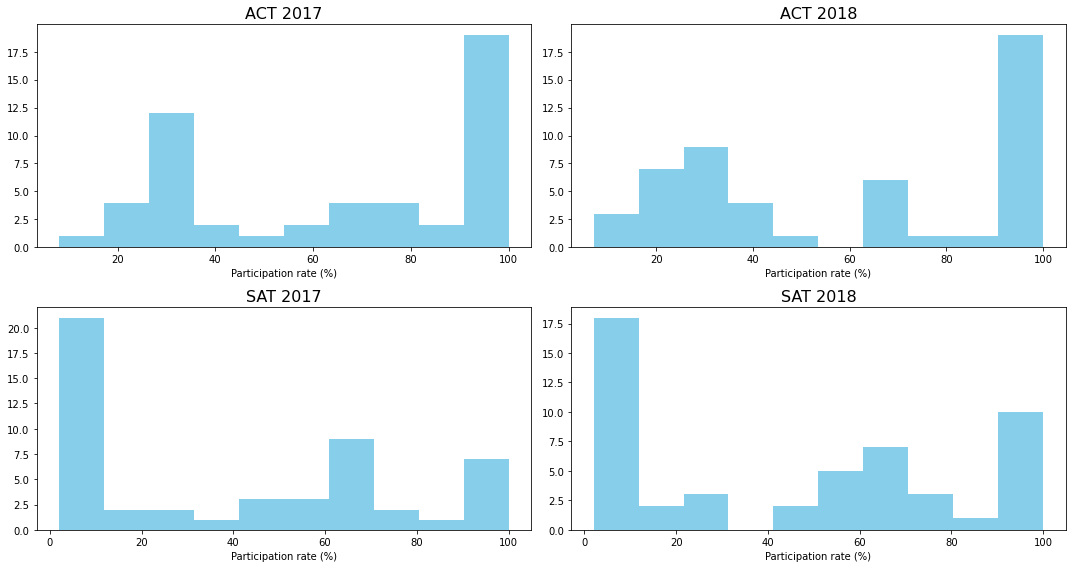

In [66]:
# Histograms of participation rate for SAT, ACT 2017 and 2018
subplot_histograms(final, ['act_2017_participation_rate', 'act_2018_participation_rate', 'sat_2017_participation_rate', 'sat_2018_participation_rate'] , ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'], ['Participation rate (%)', 'Participation rate (%)', 'Participation rate (%)', 'Participation rate (%)'])

All 4 graphs showed either bimodal or trimodal distribution, with participation rate mostly at the high end (90-100%) or low end (0-10% for SAT and 20-30% for ACT). SAT 2017 showed another peak at around 60-70%.
Few states have participation rate at around 40-50%.
ACT mostly had a large amount of participant rate concentrating at around 90 to 100%, while SAT mostly had a large amount of participant rate concentrating at around 2 to 10%. This shows that states preferred ACT to SAT examination during those two years.<br>
However, we can see that the SAT participation rate for range 90 to 100% has increased from 2017 to 2018.

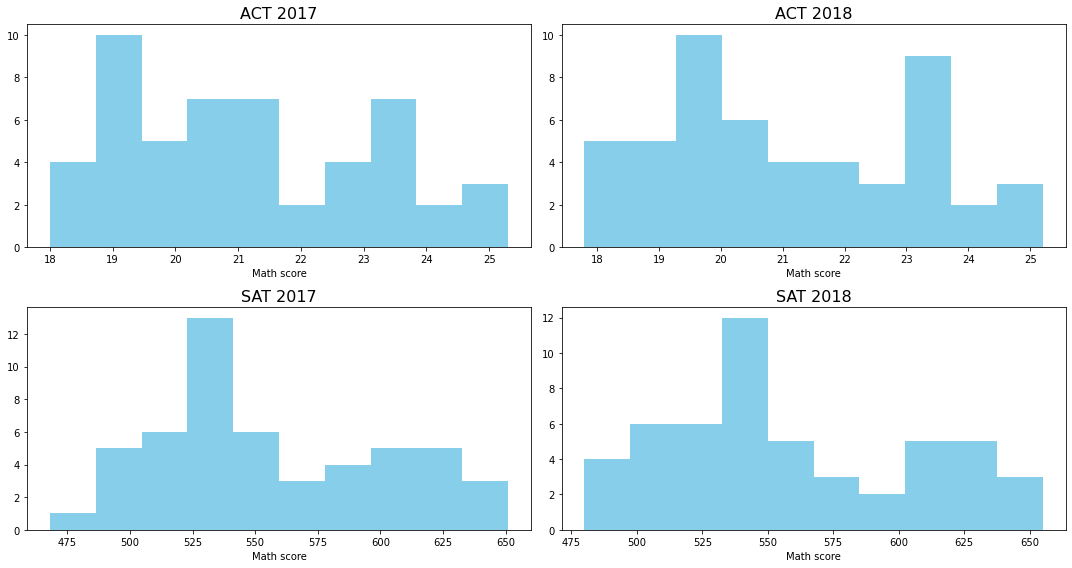

In [67]:
subplot_histograms(final, ['act_2017_math', 'act_2018_math', 'sat_2017_math', 'sat_2018_math'] , ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'], ['Math score', 'Math score', 'Math score', 'Math score'])

SAT math score histogram is unimodal at around 525 to 550, most of the states attained math score around this range. It is also right skewed. ACT math score histogram is bimodal at around 18.8 to 19.5 and 23.2 to 23.8.

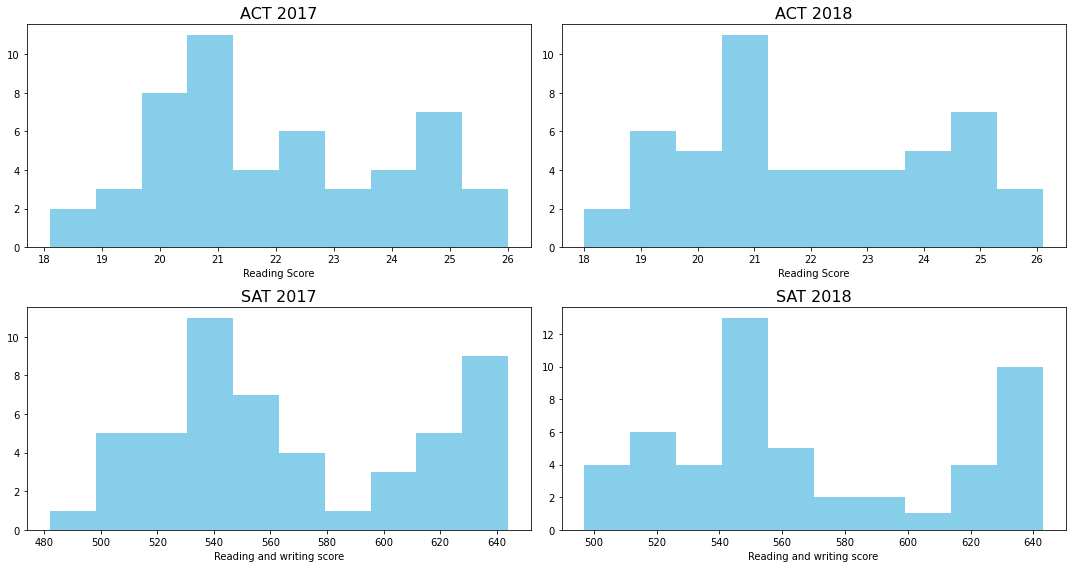

In [68]:
subplot_histograms(final, ['act_2017_reading', 'act_2018_reading', 'sat_2017_reading_writing', 'sat_2018_reading_writing'] , ['ACT 2017', 'ACT 2018', 'SAT 2017', 'SAT 2018'], ['Reading Score', 'Reading Score', 'Reading and writing score', 'Reading and writing score'])

Reading and writing score histograms are bimodal with peaks around 630 to 640 and 530 to 546.
Reading score histogram are bimodal as well with peaks around 20.5 to 21.2 and 24.5 to 25.2.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [69]:
def scatterplot(dataframe, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    plt.scatter(dataframe[x],
            dataframe[y], c=['green']);
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15)
    plt.show();

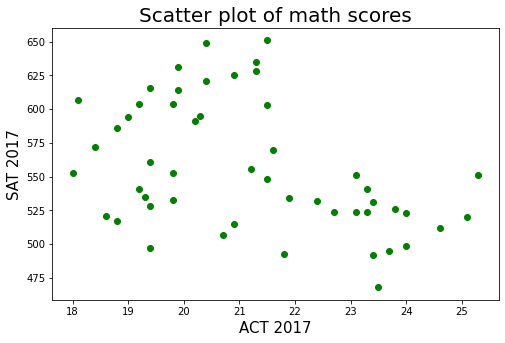

In [70]:
scatterplot(final, 'act_2017_math', 'sat_2017_math', 'Scatter plot of math scores', 'ACT 2017', 'SAT 2017')

Each point on the graph represent a state with the ACT 2017 math score on the x-axis and SAT 2017 math score on the y-axis.

There is a slight negative relationship between the math sores for SAT and ACT 2017. 
States with a high SAT math score tend to have a lower ACT math score while those with a high ACT math score tend to have a lower SAT math score. There might not be a direct cause and effect relationship but it might be due to other factors. Such as from previous analysis, a high participation rate in SAT had a low participation rate in ACT and those with high participation rate had lower score and vice versa. Hence, state with high SAT math score might have a lower participation rate that caused the higher math score while a higher participation rate in ACT caused the math score to decrease.

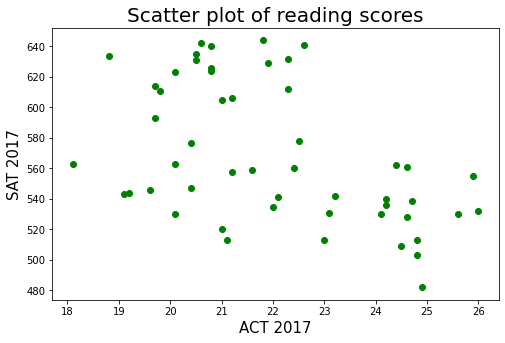

In [71]:
scatterplot(final, 'act_2017_reading', 'sat_2017_reading_writing', 'Scatter plot of reading scores', 'ACT 2017', 'SAT 2017')

Each point on the graph represent a state with the ACT 2017 reading score on the x-axis and SAT 2017 reading and writing score on the y-axis.

There is a slight negative relationship between the reading score for SAT and ACT 2017. 
States with a high SAT reading score tend to have a lower ACT reading score while those with a high ACT reading score tend to have a lower SAT reading score. However, it does not mean a cause and effect relationship exist. It might be due to other factors as explained in the analysis of scatterplot for math scores.

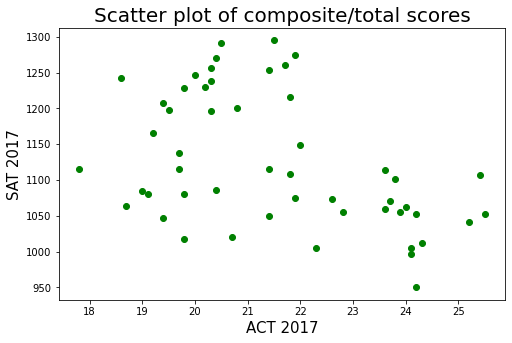

In [72]:
scatterplot(final, 'act_2017_composite', 'sat_2017_total', 'Scatter plot of composite/total scores', 'ACT 2017', 'SAT 2017')

Each point on the graph represent a state with the ACT 2017 composite score on the x-axis and SAT 2017 total score on the y-axis.

There is a negative relationship between the reading score for SAT and ACT 2017. 
States with a high SAT total score tend to have a lower ACT composite score while those with a high ACT composite score tend to have a lower SAT total score. However, it does not mean a cause and effect relationship exist. It might be due to other factors as explained above.

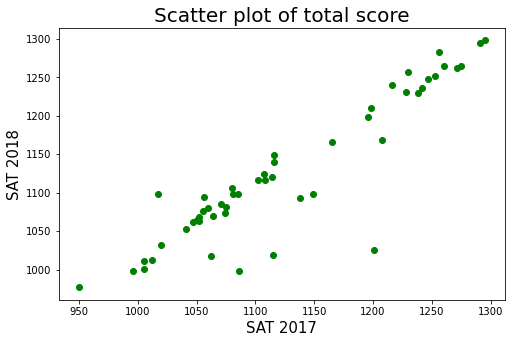

In [73]:
scatterplot(final, 'sat_2017_total', 'sat_2018_total', 'Scatter plot of total score', 'SAT 2017', 'SAT 2018')

There is a near strong positive correlation between the total scores for SAT 2017 and 2018, with some outliers. Most states who did well for in SAT 2017 are likely to do well in SAT 2018.<br>
The bottom right extreme outlier correspond to Colorado (1201, 1025).
Colorado’s participation rate increased from 11 to 100%. With an increase in participation rate, there was a decrease in SAT total score. 

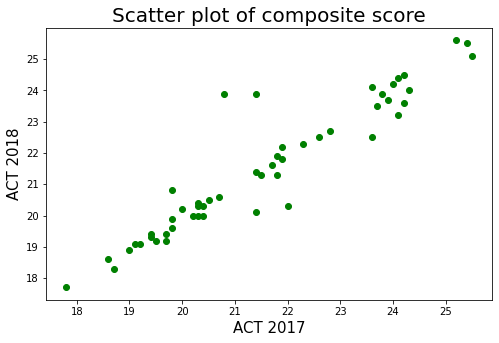

In [74]:
scatterplot(final, 'act_2017_composite', 'act_2018_composite', 'Scatter plot of composite score', 'ACT 2017', 'ACT 2018')

There is a near strong positive correlation between the composite scores for ACT 2017 and 2018, with some outliers. Most states who did well in ACT 2017 are likely to do well in ACT 2018. <br>
The top middle outliers correpond to Colorado (20.8, 23.9) and Illinois (21.4, 23.9).
Both outliers consisted of states that has a decrease in participation rate. Therefore, experienced an increase in composite score. Colorado’s participation rate decreased from 100 to 30% while Illinois’s participation rate decreased from 93% to 43%.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

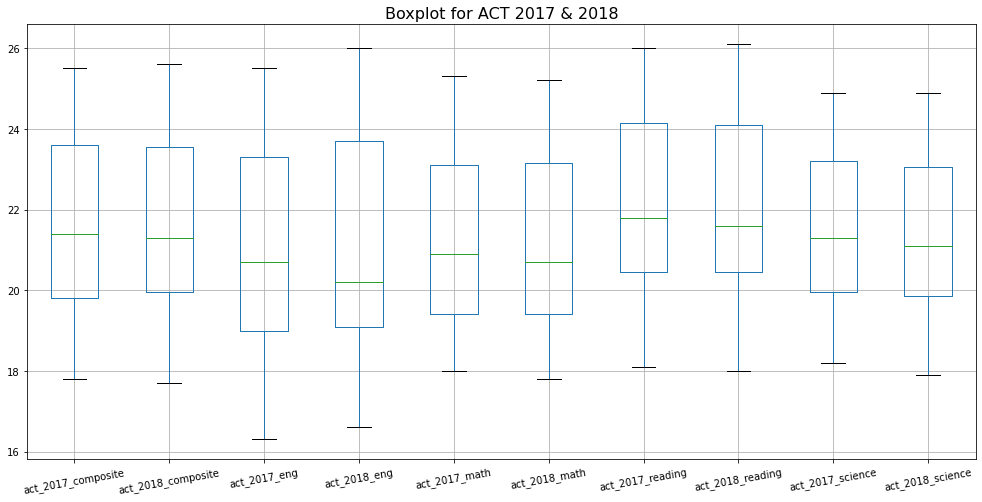

In [75]:
ax = final.boxplot(column = ['act_2017_composite', 'act_2018_composite', 'act_2017_eng', 'act_2018_eng', 'act_2017_math', 'act_2018_math', 'act_2017_reading', 'act_2018_reading', 'act_2017_science', 'act_2018_science'], figsize=(17,8), rot=10)
ax.set_title('Boxplot for ACT 2017 & 2018', fontsize=16);

The boxplot of each feature in 2017 and 2018 have roughly similar shape.

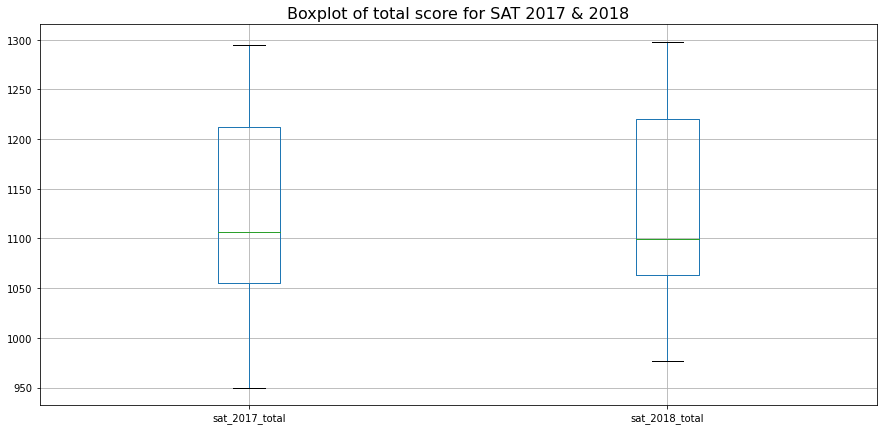

In [76]:
ax = final.boxplot(column = ['sat_2017_total', 'sat_2018_total'], figsize=(15,7))
ax.set_title('Boxplot of total score for SAT 2017 & 2018', fontsize=16);

The boxplot for SAT total score in 2017 and 2018 have roughly the same shape as well. There are no outliers.

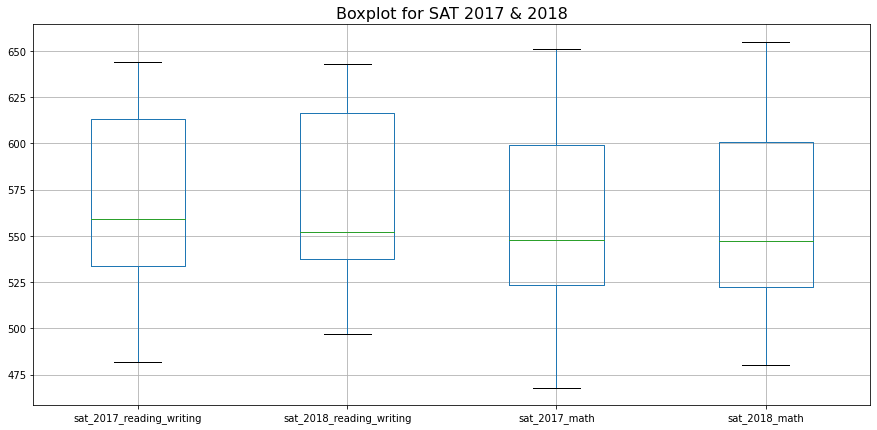

In [77]:
ax = final.boxplot(column = ['sat_2017_reading_writing', 'sat_2018_reading_writing', 'sat_2017_math', 'sat_2018_math'], figsize=(15,7))
ax.set_title('Boxplot for SAT 2017 & 2018', fontsize=16);

Boxplot for SAT individual test scores are roughly similar to the previous year.<br>
As the median of all plot are located to the lower end of the center of the box, the distribution are positively skewed.<br>
There are no outliers.

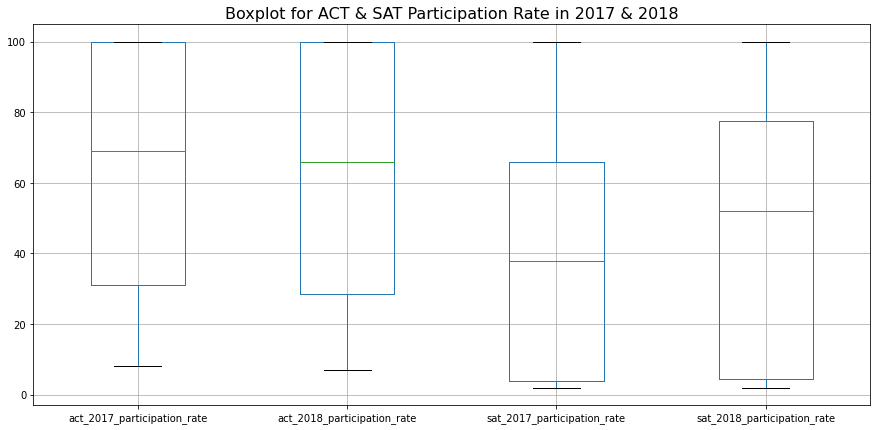

In [78]:
ax = final.boxplot(column = ['act_2017_participation_rate', 'act_2018_participation_rate','sat_2017_participation_rate', 'sat_2018_participation_rate'], figsize=(15,7))
ax.set_title('Boxplot for ACT & SAT Participation Rate in 2017 & 2018', fontsize=16);

Boxplot for SAT participation rate differs more with a bigger interquartile range in 2018 as compared to in 2017. Boxplot of ACT 2017 and 2018 had similar shape.<br>
Boxplot for SAT has its lower quartile near to the minimum, indicating that the data less than the median is more likely to be relatively consistent, as there is not a large jump between the the minimum and 25th percentile. The longer whisker on the higher end might suggest that there are bigger variance among higher participation rate and is positively skewed. Conversly, the boxplots for ACT are negatively skewed. As theorized earlier, most states tend to make either the ACT or SAT compulsory, hence it is sound that the ACT and SAT boxplots are skewed in the opposite directions. However, from 2017 to 2018, the SAT boxplot shows an increase in the median, signifying that the participation rate of SAT has increased.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Additional trends and relationship was explored in the last section of investigating trends in the data.

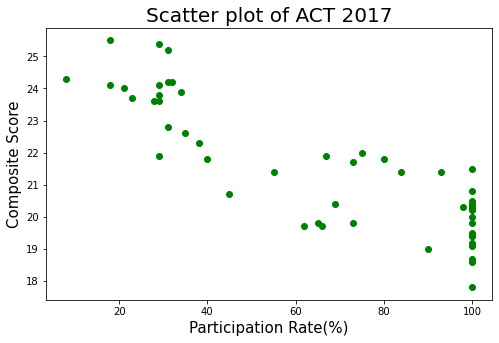

In [79]:
# Relationship between participation rate and composite score for ACT 2017
scatterplot(final, 'act_2017_participation_rate', 'act_2017_composite', 'Scatter plot of ACT 2017', 'Participation Rate(%)', 'Composite Score')

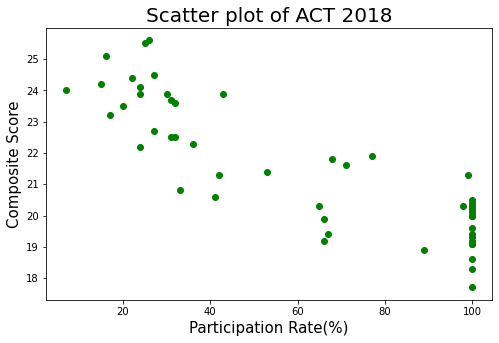

In [80]:
# Relationship between participation rate and composite score for ACT 2018
scatterplot(final, 'act_2018_participation_rate', 'act_2018_composite', 'Scatter plot of ACT 2018', 'Participation Rate(%)', 'Composite Score')

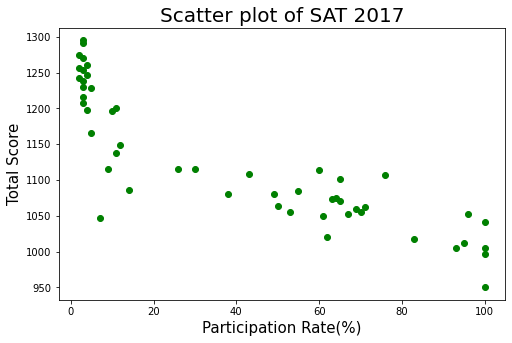

In [81]:
# Relationship between participation rate and total score for SAT 2017
scatterplot(final, 'sat_2017_participation_rate', 'sat_2017_total', 'Scatter plot of SAT 2017', 'Participation Rate(%)', 'Total Score')

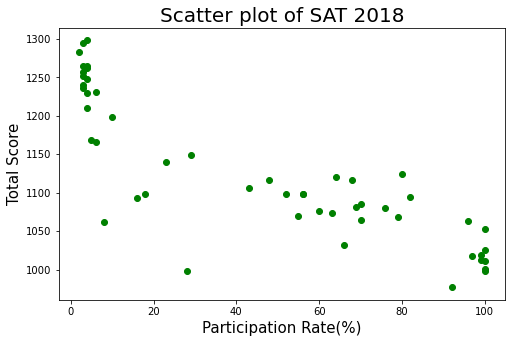

In [82]:
# Relationship between participation rate and total score for SAT 2018
scatterplot(final, 'sat_2018_participation_rate', 'sat_2018_total', 'Scatter plot of SAT 2018', 'Participation Rate(%)', 'Total Score')

All 4 scatter plots above show that the total/composite scores decrease as participation rate increase. There is an inverse relationship between total score and participation rate. This might be due to more students with varying capabilites or not being well prepared taking the test, hence reducing the mean total/composite scores. When the test is voluntary (small participation rate), the test is likely to be taken by high-achieving students and hence increases the mean total/composite score.

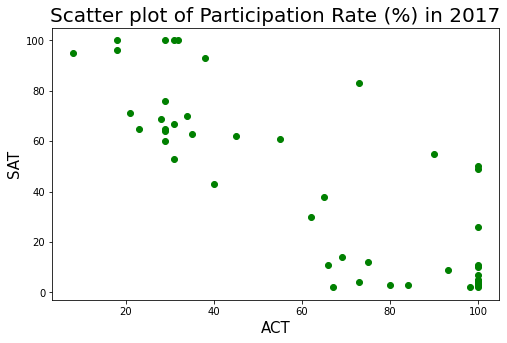

In [83]:
# Relationship between participation rate of ACT and SAT in 2017
scatterplot(final, 'act_2017_participation_rate', 'sat_2017_participation_rate', 'Scatter plot of Participation Rate (%) in 2017', 'ACT', 'SAT')

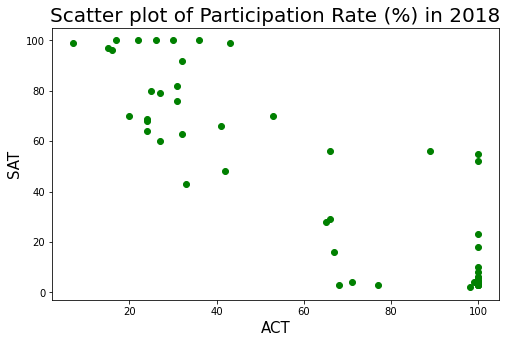

In [84]:
# Relationship between participation rate of ACT and SAT in 2018
scatterplot(final, 'act_2018_participation_rate', 'sat_2018_participation_rate', 'Scatter plot of Participation Rate (%) in 2018', 'ACT', 'SAT')

From the 2 scatter plots above, SAT and ACT have an inverse relationship for participation rate. Many states choose to concentrate on either test.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [85]:
# Quick summary statistics of numeric columns
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation_rate,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation_rate,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


The mean participation rate for SAT 2017 is 39.8 and SAT 2018 is 45.7. <br>
The mean participation rate for ACT 2017 is 65.3 and ACT 2018 is 61.6. <br>
This is probably due to states switching the test required from ACT to SAT.

<br>
The participation rate standard deviation for SAT increases from 35.3 to 37.3 in year 2017 to 2018.<br>
The participation rate standard deviation for ACT increases from 32.1 to 34.1 in year 2017 to 2018.<br>
Both standared deviation increased, indicating that the data distribution was more spread out in 2018. However, SAT participation rate has always a higher standard deviation than ACT.<br>

<br>
ACT 2017, 2018 and SAT 2018 participation distribution are left skewed as their means are below their median values.<br>
SAT 2017 is right skewed as its mean is above its median.<br>

<br>
The mean composite score for ACT remained fairly constant at 21.5, while the mean total score for SAT decreased from 1126 to 1120. This is likely due to the fact that more states are shifting to SAT, with a larger number of students taking the SAT, the mean total score decreases as the range of students with varying intelligence increases.

<br>
The mean scores for all the different test in ACT are around 21 to 22 and standard deviation of about 2. The mean values are near the median values, suggesting that they might follow a normal distribution. However, from the boxplot above, it can be clearly seen that they do not really follow a normal distribution, especially for the english and reading exams.

<br>
The mean scores for the different test in SAT are lower than the median values, implying a right skewed distribution. This is in agreement with the boxplot shown above.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: The histograms observed in the previous section were bimodal or trimodal or skewed. Hence, the population is not normally distributed. However, for large sample sizes, by the Central Limit Theorem, sample means can be normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: According to the Central Limit Theorem, estimates of math, reading and rates can be approximately normally distributed as the sample size is more than 30. The estimates made from these data are likely be good as long as the number of data is large and the values in data are accurate.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It makes sense to seek some relationship between SAT and ACT participation rates in 2017 as it can give some clues. For example, both had an inverse relationship where states with high participation rate in SAT had low participation rate in ACT. This is probably because most states prioritize one test over the other. Furthermore, the SAT and ACT data are official data that account for every participant, giving good representation of the entire population. However, more information is required to draw a conclusion, for example the actual population of each state in 2017 and 2018.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It is not appropriate as both SAT and ACT might test on different topics, and their range of scores are different. However, the scores can be normalized if comparison is needed, using either the minimum and maximum possible score of each test or the minimum and maximum score attained for that particular year.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [86]:
# H0: SAT 2017 avg pariticipation rate - ACT 2017 avg participation rate <= 0
# HA: SAT 2017 avg participation rate - ACT 2017 avg participation rate > 0
# Running paired t-test on composite and total score
stats.ttest_rel(final['sat_2017_participation_rate'], final['act_2017_participation_rate'], alternative='greater')

Ttest_relResult(statistic=-2.809551978370788, pvalue=0.9964690357889587)

At 5% level of significance, as p-value > 0.05, we fail to reject the null hypothesis that the mean SAT 2017 participation rate is less than or equal to the mean ACT 2017 participation rate.

In [87]:
# H0: SAT 2018 avg pariticipation rate - SAT 2017 avg participation rate <= 0
# HA: SAT 2018 avg participation rate - SAT 2017 avg participation rate > 0
# Running paired t-test on composite and total score
stats.ttest_rel(final['sat_2018_participation_rate'], final['sat_2017_participation_rate'], alternative='greater')

Ttest_relResult(statistic=2.3220824787932677, pvalue=0.012170583079573812)

At 5% level of significance, as the p-value < 0.05, we reject the null hypothesis that the mean SAT 2018 participation rate is less than or equal to the mean SAT 2017 participation rate.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

From 2017 to 2018:
- Illinois showed the largest increase in SAT participation rate of 90% and the second largest decrease in ACT participation rate of 50%.
- Florida is one of the state with a high participation of more than 50% in both SAT and ACT.
- Ohio had both increase in SAT and ACT participation rate of 25% and 6% respectively.

Illinois switched the compulsory test from ACT to SAT. Hence, an increase in participation for SAT was observed together with a decrease in participation in ACT. The Illinois State Board of Education (ISBE) reviewed both examinations and concluded that the SAT suits the learning outcome for students better.

[Illinois_reference](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)

Central Florida allowed students to take the ACT or SAT during a typical school day with the cost borned by the school.
The state made it compulsory for students to partake in either the ACT or SAT examination if they want to enter Florida's state college. Having it fully subsidized and given the choice to take either test resulted in high participation rates above 50% for both SAT and ACT.

[Florida_reference](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)

Ohio introduced the legislation for 11th graders to complete either the ACT or SAT. This caused an increase in both the participation rate in SAT and ACT. Furthermore, the state would sponsor every student for either test.

[Ohio_reference](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Alaska has a participation rate below 50% for both ACT and SAT 2017 and 2018.<br>
Alaska's ACT participation rate dropped from 65 to 33% and SAT participation rate increased slightly from 38 to 43%.<br>
Alaska Legislature abolished the requirement of sitting for the SAT or ACT test. Previously, students were funded by the state when they took the test. The intent was for students to concentrate on their high school curriculum. Without the encouragement from the state, participation rate naturally dwindled.

[Alaska_reference](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/)

[Alaska_reference_2](https://www.alaskapublic.org/2016/07/01/alaska-changes-hs-diploma-requirements-no-more-sat-act/)

<br>

- College Board can have a discussion with Alaska to implement SAT as a mandatory requirement for graduating high school students. Benefits of taking the SAT exam should be made known clearly. For example, improving students higher level logical and reasoning skills, gearing them towards solving real-world problems and less on formula based questions. This would prepare them better at transitioning from school to the working world.
<br>From the above data, it can be seen that states having a required test of either ACT or SAT have a larger participation rate in the examination. For example, Michigan had a participation rate of 100% for 2017 and 2018 SAT because it was compulsory for students to take the SAT.
<br><br>
- College Board can work with Alaska to lower the cost of SAT, reducing students' financial burden. Either by providing resources like meals to supply students with energy before the commencement of the test or vouchers upon completion of the test.
<br><br>
- College Board can help to increase the confidence level of students by them achieving their maximum potential. A way could be providing free classes and mock tests either in their school or online to hone their problem solving and filling any gaps in their understanding of the individual section of the test This would help greatly with their motivation and also to look forward to taking the examination.
<br>